### Imports and functions

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# from google.cloud import storage

# client = storage.Client()
# for blob in client.list_blobs('climateai_data_repository', prefix='tmp/internal_variability'):
#   print(str(blob))

In [3]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
import intake 
import pprint
# from src.LE_LoadAndMerge import *
from scipy import stats
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
from copy import deepcopy
from src.multi_model_large_ensemble import MultiModelLargeEnsemble

In [19]:
# def sensitivity_test(parameter,region,x_type,load,args):
#     values = args[parameter]
#     datasets = []
#     for i in values:
#         args[parameter] = i
#         internal = region.compute_x(x_type=x_type,load=load,**args)
#         datasets.append(internal)
#     dataset = xr.concat(datasets, dim=values)
#     # dataset['MTratio'] = dataset.model_le/dataset.total_le
        
#     return dataset

In [37]:
def sensitivity_test(parameter,region,x_type,load,args):
    values = args[parameter]
    datasets = []
    for i in values:
        args[parameter] = i
        region.compute_x(x_type=x_type,load=load,**args)
        region.compute_LE()
        region.compute_FIT()
        internal = region.results
        internal = internal.squeeze()
        datasets.append(internal)
    dataset = xr.concat(datasets, dim=values)
    dataset['MTratio'] = (dataset.M_LE/dataset.T_LE)*100
        
    return dataset

In [38]:
def sensitivity_allregions(parameter,x_type,load,args):
    regions = [USwest,europe,australia,tropics]
    dss = []
    for r in regions:
        tmp_args = deepcopy(args)
        ds = sensitivity_test(parameter=parameter,region=r,x_type=x_type,load=load,args=tmp_args)
        ds = ds.expand_dims('region')
        dss.append(ds)
    regions = ['USwest','europe','australia','tropics']
    final_dataset = xr.concat(dss,dim='region')
    final_dataset = final_dataset.assign_coords({'region':regions})
    
    return final_dataset

In [6]:
def extreme_internal_allregions(args):
    regions = [USwest,europe,australia,tropics]
    dss = []
    for r in regions:
        internal = r.extreme_internal_variability(**args)
        internal = internal.expand_dims('region')
        dss.append(internal)
    regions = ['USwest','europe','australia','tropics']
    final_dataset = xr.concat(dss,dim='region')
    final_dataset = final_dataset.assign_coords({'region':regions})
    return final_dataset

## Global code 

In [14]:
-53.1 % 360

306.9

In [4]:
# setting 
variable = 'tas'
# variable = 'tasmax'
# variable = 'pr'
models = ['MIROC6', 'CanESM5', 'MPI-ESM1-2-LR', 'EC-Earth3']

In [5]:
USwest = MultiModelLargeEnsemble(models=models, variable=variable, granularity='day', 
                               lat=37.7, lon=237.6, 
                               bucket='climateai_data_repository', path='tmp/global_cmip_2.5deg')

In [6]:
europe = MultiModelLargeEnsemble(models=models, variable=variable, granularity='day', 
                               lat=51, lon=10.5, 
                               bucket='climateai_data_repository', path='tmp/global_cmip_2.5deg')

In [7]:
australia = MultiModelLargeEnsemble(models=models, variable=variable, granularity='day', 
                               lat=-25.2, lon=133.7, 
                               bucket='climateai_data_repository', path='tmp/global_cmip_2.5deg')

In [8]:
tropics = MultiModelLargeEnsemble(models=models, variable=variable, granularity='day', 
                               lat=3.9, lon=306.9, 
                               bucket='climateai_data_repository', path='tmp/global_cmip_2.5deg')

In [39]:
test_return = sensitivity_allregions(parameter='return_period',
                 x_type='quantile_return',
                 load=False,
                 args = {'return_period':[5,10,20,50,100],
                            'coarsen':1,
                            'consec_days':1,
                            'rolling_average':10,
                            'hist_slice':slice('1995','2014')
                            })

100%|██████████| 1/1 [00:01<00:00,  1.77s/it]


8.627449035644531


100%|██████████| 1/1 [00:01<00:00,  1.58s/it]


8.493865966796875


100%|██████████| 1/1 [00:00<00:00,  2.73it/s]


8.495708465576172


100%|██████████| 1/1 [00:01<00:00,  1.60s/it]


8.504581451416016


100%|██████████| 1/1 [00:01<00:00,  1.59s/it]


8.504467010498047


100%|██████████| 1/1 [00:01<00:00,  1.54s/it]


8.507389068603516


100%|██████████| 1/1 [00:00<00:00,  2.75it/s]


8.507610321044922


100%|██████████| 1/1 [00:01<00:00,  1.91s/it]


8.497016906738281


100%|██████████| 1/1 [00:01<00:00,  1.57s/it]


8.512203216552734


100%|██████████| 1/1 [00:01<00:00,  1.51s/it]


8.493518829345703


100%|██████████| 1/1 [00:00<00:00,  2.77it/s]


8.51180648803711


100%|██████████| 1/1 [00:01<00:00,  1.66s/it]


8.494544982910156


100%|██████████| 1/1 [00:01<00:00,  1.61s/it]


8.534111022949219


100%|██████████| 1/1 [00:01<00:00,  1.56s/it]


8.533283233642578


100%|██████████| 1/1 [00:00<00:00,  2.77it/s]


8.531524658203125


100%|██████████| 1/1 [00:01<00:00,  1.63s/it]


8.688987731933594


100%|██████████| 1/1 [00:01<00:00,  1.76s/it]


8.519599914550781


100%|██████████| 1/1 [00:01<00:00,  1.70s/it]


8.523998260498047


100%|██████████| 1/1 [00:00<00:00,  1.74it/s]


8.521785736083984


100%|██████████| 1/1 [00:01<00:00,  1.62s/it]


8.511844635009766


100%|██████████| 1/1 [00:01<00:00,  1.75s/it]


8.52187728881836


100%|██████████| 1/1 [00:01<00:00,  1.57s/it]


8.52048110961914


100%|██████████| 1/1 [00:00<00:00,  2.16it/s]


8.519725799560547


100%|██████████| 1/1 [00:01<00:00,  1.60s/it]


8.523120880126953


100%|██████████| 1/1 [00:01<00:00,  1.99s/it]


8.51540756225586


100%|██████████| 1/1 [00:01<00:00,  1.52s/it]


8.51751708984375


100%|██████████| 1/1 [00:00<00:00,  2.63it/s]


8.516014099121094


100%|██████████| 1/1 [00:01<00:00,  1.94s/it]


8.512680053710938


100%|██████████| 1/1 [00:01<00:00,  1.84s/it]


8.520668029785156


100%|██████████| 1/1 [00:01<00:00,  1.56s/it]


8.505210876464844


100%|██████████| 1/1 [00:01<00:00,  1.41s/it]


8.523658752441406


100%|██████████| 1/1 [00:01<00:00,  1.63s/it]


8.528522491455078


100%|██████████| 1/1 [00:01<00:00,  1.54s/it]


8.52481460571289


100%|██████████| 1/1 [00:01<00:00,  1.53s/it]


8.522392272949219


100%|██████████| 1/1 [00:00<00:00,  2.74it/s]


8.526775360107422


100%|██████████| 1/1 [00:01<00:00,  1.75s/it]


8.525287628173828


100%|██████████| 1/1 [00:01<00:00,  1.67s/it]


8.518047332763672


100%|██████████| 1/1 [00:01<00:00,  1.53s/it]


8.512516021728516


100%|██████████| 1/1 [00:00<00:00,  2.67it/s]


8.511760711669922


100%|██████████| 1/1 [00:01<00:00,  1.63s/it]


8.509502410888672


100%|██████████| 1/1 [00:01<00:00,  1.65s/it]


8.51858139038086


100%|██████████| 1/1 [00:01<00:00,  1.70s/it]


8.524662017822266


100%|██████████| 1/1 [00:00<00:00,  2.34it/s]


8.521598815917969


100%|██████████| 1/1 [00:01<00:00,  1.60s/it]


8.524765014648438


100%|██████████| 1/1 [00:01<00:00,  1.53s/it]


8.51922607421875


100%|██████████| 1/1 [00:01<00:00,  1.55s/it]


8.527332305908203


100%|██████████| 1/1 [00:00<00:00,  2.66it/s]


8.526630401611328


100%|██████████| 1/1 [00:01<00:00,  1.59s/it]


8.525020599365234


100%|██████████| 1/1 [00:01<00:00,  1.75s/it]


8.524200439453125


100%|██████████| 1/1 [00:01<00:00,  1.54s/it]


8.521392822265625


100%|██████████| 1/1 [00:00<00:00,  2.58it/s]


8.528465270996094


100%|██████████| 1/1 [00:01<00:00,  1.66s/it]


8.523162841796875


100%|██████████| 1/1 [00:01<00:00,  1.65s/it]


8.524738311767578


100%|██████████| 1/1 [00:01<00:00,  1.59s/it]


8.523811340332031


100%|██████████| 1/1 [00:00<00:00,  1.72it/s]


8.523391723632812


100%|██████████| 1/1 [00:01<00:00,  1.62s/it]


8.521686553955078


100%|██████████| 1/1 [00:01<00:00,  1.56s/it]


8.524166107177734


100%|██████████| 1/1 [00:01<00:00,  1.62s/it]


8.519779205322266


100%|██████████| 1/1 [00:00<00:00,  2.49it/s]


8.528865814208984


100%|██████████| 1/1 [00:01<00:00,  1.59s/it]


8.528751373291016


100%|██████████| 1/1 [00:01<00:00,  1.54s/it]


8.517993927001953


100%|██████████| 1/1 [00:01<00:00,  1.54s/it]


8.521968841552734


100%|██████████| 1/1 [00:00<00:00,  2.60it/s]


8.52280044555664


100%|██████████| 1/1 [00:01<00:00,  1.62s/it]


8.52020263671875


100%|██████████| 1/1 [00:01<00:00,  1.56s/it]


8.523944854736328


100%|██████████| 1/1 [00:01<00:00,  1.55s/it]


8.515811920166016


100%|██████████| 1/1 [00:00<00:00,  2.72it/s]


8.520030975341797


100%|██████████| 1/1 [00:01<00:00,  1.59s/it]


8.516807556152344


100%|██████████| 1/1 [00:01<00:00,  1.54s/it]


8.52469253540039


100%|██████████| 1/1 [00:01<00:00,  1.54s/it]


8.519367218017578


100%|██████████| 1/1 [00:00<00:00,  2.78it/s]

8.506172180175781



100%|██████████| 1/1 [00:01<00:00,  1.56s/it]


8.52652359008789


100%|██████████| 1/1 [00:01<00:00,  1.54s/it]


8.524463653564453


100%|██████████| 1/1 [00:01<00:00,  1.56s/it]


8.520179748535156


100%|██████████| 1/1 [00:00<00:00,  2.80it/s]


8.49673843383789


100%|██████████| 1/1 [00:01<00:00,  1.56s/it]


8.520751953125


100%|██████████| 1/1 [00:01<00:00,  1.54s/it]


8.524261474609375


100%|██████████| 1/1 [00:01<00:00,  1.58s/it]


8.533222198486328


100%|██████████| 1/1 [00:00<00:00,  2.78it/s]


8.533817291259766


100%|██████████| 1/1 [00:01<00:00,  1.61s/it]

8.511497497558594


In [41]:
test_histslice = sensitivity_allregions(parameter='hist_slice',
                                        x_type = 'quantile_return',
                                        load=False,
                                        args = {'return_period':10,
                                                'coarsen':1,
                                                'consec_days':1,
                                                'rolling_average':10,
                                                'hist_slice':[slice('1920','1940'),slice('1960','1980'),
                                                              slice('1990','2010'),slice('1995','2014'),
                                                              slice(None, None), slice('1990', None)]
                                               }
                                       )

100%|██████████| 1/1 [00:01<00:00,  1.59s/it]


8.529006958007812


100%|██████████| 1/1 [00:01<00:00,  1.57s/it]


8.528457641601562


100%|██████████| 1/1 [00:00<00:00,  2.67it/s]

8.528602600097656


ValueError: The overlapping depth 1 is larger than your array 0.

In [42]:
test_coarsen = sensitivity_allregions(parameter='coarsen',
                                    x_type = 'quantile_return',
                                    load=False,
                                    args = {'return_period':10,
                                            'coarsen':[1,3,5,7],
                                            'consec_days':1,
                                            'rolling_average':10,
                                            'hist_slice':slice('1995','2014')
                                            
                                           })

100%|██████████| 1/1 [00:01<00:00,  1.74s/it]


8.517841339111328


100%|██████████| 1/1 [00:01<00:00,  1.56s/it]


8.517295837402344


100%|██████████| 1/1 [00:00<00:00,  2.78it/s]


8.522159576416016


100%|██████████| 1/1 [00:01<00:00,  1.63s/it]


8.519859313964844


100%|██████████| 1/1 [00:01<00:00,  1.57s/it]


8.520057678222656


100%|██████████| 1/1 [00:01<00:00,  1.54s/it]


8.531257629394531


100%|██████████| 1/1 [00:00<00:00,  2.78it/s]


8.524574279785156


100%|██████████| 1/1 [00:01<00:00,  1.64s/it]


8.52139663696289


100%|██████████| 1/1 [00:01<00:00,  1.87s/it]


8.520668029785156


100%|██████████| 1/1 [00:01<00:00,  1.51s/it]


8.518871307373047


100%|██████████| 1/1 [00:00<00:00,  2.79it/s]


8.525768280029297


100%|██████████| 1/1 [00:01<00:00,  1.58s/it]


8.526050567626953


100%|██████████| 1/1 [00:01<00:00,  1.58s/it]


8.52975845336914


100%|██████████| 1/1 [00:01<00:00,  1.51s/it]


8.532196044921875


100%|██████████| 1/1 [00:00<00:00,  2.76it/s]


8.530967712402344


100%|██████████| 1/1 [00:01<00:00,  1.58s/it]


8.524410247802734


100%|██████████| 1/1 [00:01<00:00,  1.70s/it]


8.517528533935547


100%|██████████| 1/1 [00:01<00:00,  1.54s/it]


8.519912719726562


100%|██████████| 1/1 [00:00<00:00,  2.62it/s]


8.519718170166016


100%|██████████| 1/1 [00:01<00:00,  1.56s/it]


8.515716552734375


100%|██████████| 1/1 [00:01<00:00,  1.52s/it]


8.522953033447266


100%|██████████| 1/1 [00:01<00:00,  1.53s/it]


8.524677276611328


100%|██████████| 1/1 [00:00<00:00,  2.82it/s]


8.522903442382812


100%|██████████| 1/1 [00:01<00:00,  1.52s/it]


8.528984069824219


100%|██████████| 1/1 [00:01<00:00,  1.50s/it]


8.533100128173828


100%|██████████| 1/1 [00:01<00:00,  1.62s/it]


8.539535522460938


100%|██████████| 1/1 [00:00<00:00,  2.73it/s]


8.536258697509766


100%|██████████| 1/1 [00:01<00:00,  1.57s/it]


8.534564971923828


100%|██████████| 1/1 [00:01<00:00,  1.71s/it]


8.537139892578125


100%|██████████| 1/1 [00:01<00:00,  1.47s/it]


8.553573608398438


100%|██████████| 1/1 [00:00<00:00,  2.84it/s]


8.533119201660156


100%|██████████| 1/1 [00:01<00:00,  1.55s/it]


8.527721405029297


100%|██████████| 1/1 [00:01<00:00,  1.51s/it]


8.532691955566406


100%|██████████| 1/1 [00:01<00:00,  1.52s/it]


8.53371810913086


100%|██████████| 1/1 [00:00<00:00,  2.38it/s]


8.527168273925781


100%|██████████| 1/1 [00:01<00:00,  1.57s/it]


8.52640151977539


100%|██████████| 1/1 [00:01<00:00,  1.55s/it]


8.539665222167969


100%|██████████| 1/1 [00:01<00:00,  1.54s/it]


8.527759552001953


100%|██████████| 1/1 [00:00<00:00,  2.68it/s]


8.536312103271484


100%|██████████| 1/1 [00:01<00:00,  1.61s/it]


8.52975845336914


100%|██████████| 1/1 [00:01<00:00,  1.58s/it]


8.528484344482422


100%|██████████| 1/1 [00:01<00:00,  1.52s/it]


8.530208587646484


100%|██████████| 1/1 [00:00<00:00,  2.88it/s]


8.529155731201172


100%|██████████| 1/1 [00:01<00:00,  1.74s/it]


8.531692504882812


100%|██████████| 1/1 [00:01<00:00,  1.60s/it]


8.531944274902344


100%|██████████| 1/1 [00:01<00:00,  1.53s/it]


8.535453796386719


100%|██████████| 1/1 [00:00<00:00,  2.78it/s]


8.528362274169922


100%|██████████| 1/1 [00:01<00:00,  1.53s/it]


8.536003112792969


100%|██████████| 1/1 [00:01<00:00,  1.74s/it]


8.530014038085938


100%|██████████| 1/1 [00:01<00:00,  1.49s/it]


8.523921966552734


100%|██████████| 1/1 [00:00<00:00,  2.90it/s]


8.534889221191406


100%|██████████| 1/1 [00:01<00:00,  1.53s/it]


8.532421112060547


100%|██████████| 1/1 [00:01<00:00,  1.51s/it]


8.532779693603516


100%|██████████| 1/1 [00:01<00:00,  1.56s/it]


8.530799865722656


100%|██████████| 1/1 [00:00<00:00,  2.77it/s]


8.534652709960938


100%|██████████| 1/1 [00:01<00:00,  1.56s/it]


8.537784576416016


100%|██████████| 1/1 [00:01<00:00,  1.48s/it]


8.532363891601562


100%|██████████| 1/1 [00:01<00:00,  1.47s/it]


8.531120300292969


100%|██████████| 1/1 [00:00<00:00,  2.89it/s]


8.540904998779297


100%|██████████| 1/1 [00:01<00:00,  1.56s/it]


8.533710479736328


100%|██████████| 1/1 [00:01<00:00,  1.48s/it]


8.529895782470703


100%|██████████| 1/1 [00:01<00:00,  1.48s/it]


8.536563873291016


100%|██████████| 1/1 [00:00<00:00,  2.87it/s]


8.531169891357422


100%|██████████| 1/1 [00:01<00:00,  1.50s/it]

8.530174255371094


In [43]:
test_conseq = sensitivity_allregions(parameter='consec_days',
                                     x_type='quantile_return',
                                     load=False,
                       args= {'return_period':10,
                              'coarsen':1,
                              'consec_days':[1,3,5,7],
                              'rolling_average':10,
                              'hist_slice':slice('1995','2014')
                             }
                      )

100%|██████████| 1/1 [00:01<00:00,  1.59s/it]


8.536788940429688


100%|██████████| 1/1 [00:01<00:00,  1.54s/it]


8.536201477050781


100%|██████████| 1/1 [00:00<00:00,  2.59it/s]


8.536323547363281


100%|██████████| 1/1 [00:01<00:00,  1.89s/it]

8.531597137451172



100%|██████████| 1/1 [00:02<00:00,  2.06s/it]


8.537796020507812


100%|██████████| 1/1 [00:02<00:00,  2.09s/it]


8.533729553222656


100%|██████████| 1/1 [00:00<00:00,  2.21it/s]


8.540390014648438


100%|██████████| 1/1 [00:02<00:00,  2.32s/it]


8.54330062866211


100%|██████████| 1/1 [00:02<00:00,  2.36s/it]


8.534969329833984


100%|██████████| 1/1 [00:02<00:00,  2.10s/it]


8.53438949584961


100%|██████████| 1/1 [00:00<00:00,  2.18it/s]


8.544288635253906


100%|██████████| 1/1 [00:02<00:00,  2.32s/it]


8.543739318847656


100%|██████████| 1/1 [00:02<00:00,  2.11s/it]


8.53548812866211


100%|██████████| 1/1 [00:02<00:00,  2.31s/it]


8.536052703857422


100%|██████████| 1/1 [00:00<00:00,  2.15it/s]


8.535884857177734


100%|██████████| 1/1 [00:02<00:00,  2.24s/it]


8.54037094116211


100%|██████████| 1/1 [00:01<00:00,  1.50s/it]


8.541458129882812


100%|██████████| 1/1 [00:01<00:00,  1.51s/it]


8.53982925415039


100%|██████████| 1/1 [00:00<00:00,  2.72it/s]


8.539180755615234


100%|██████████| 1/1 [00:01<00:00,  1.57s/it]


8.534664154052734


100%|██████████| 1/1 [00:02<00:00,  2.15s/it]


8.542713165283203


100%|██████████| 1/1 [00:02<00:00,  2.30s/it]


8.536548614501953


100%|██████████| 1/1 [00:00<00:00,  2.23it/s]


8.535301208496094


100%|██████████| 1/1 [00:02<00:00,  2.36s/it]


8.528839111328125


100%|██████████| 1/1 [00:02<00:00,  2.18s/it]


8.542011260986328


100%|██████████| 1/1 [00:02<00:00,  2.07s/it]


8.545589447021484


100%|██████████| 1/1 [00:00<00:00,  2.21it/s]

8.551387786865234



100%|██████████| 1/1 [00:02<00:00,  2.26s/it]


8.543754577636719


100%|██████████| 1/1 [00:02<00:00,  2.03s/it]


8.542400360107422


100%|██████████| 1/1 [00:02<00:00,  2.04s/it]


8.54195785522461


100%|██████████| 1/1 [00:00<00:00,  2.20it/s]


8.542003631591797


100%|██████████| 1/1 [00:02<00:00,  2.56s/it]


8.54379653930664


100%|██████████| 1/1 [00:01<00:00,  1.50s/it]


8.542381286621094


100%|██████████| 1/1 [00:01<00:00,  1.49s/it]


8.542762756347656


100%|██████████| 1/1 [00:00<00:00,  2.79it/s]


8.541877746582031


100%|██████████| 1/1 [00:01<00:00,  1.57s/it]


8.541976928710938


100%|██████████| 1/1 [00:02<00:00,  2.07s/it]


8.547309875488281


100%|██████████| 1/1 [00:02<00:00,  2.14s/it]


8.534797668457031


100%|██████████| 1/1 [00:00<00:00,  2.19it/s]


8.535667419433594


100%|██████████| 1/1 [00:02<00:00,  2.53s/it]


8.545669555664062


100%|██████████| 1/1 [00:02<00:00,  2.08s/it]


8.545604705810547


100%|██████████| 1/1 [00:02<00:00,  2.12s/it]


8.542224884033203


100%|██████████| 1/1 [00:00<00:00,  2.21it/s]


8.540271759033203


100%|██████████| 1/1 [00:02<00:00,  2.56s/it]


8.542827606201172


100%|██████████| 1/1 [00:02<00:00,  2.10s/it]


8.537246704101562


100%|██████████| 1/1 [00:02<00:00,  2.05s/it]


8.541175842285156


100%|██████████| 1/1 [00:00<00:00,  2.13it/s]


8.53964614868164


100%|██████████| 1/1 [00:02<00:00,  2.31s/it]


8.547874450683594


100%|██████████| 1/1 [00:01<00:00,  1.58s/it]


8.545234680175781


100%|██████████| 1/1 [00:01<00:00,  1.64s/it]


8.539657592773438


100%|██████████| 1/1 [00:00<00:00,  1.67it/s]


8.548728942871094


100%|██████████| 1/1 [00:01<00:00,  1.90s/it]


8.54656982421875


100%|██████████| 1/1 [00:02<00:00,  2.14s/it]


8.538017272949219


100%|██████████| 1/1 [00:02<00:00,  2.12s/it]


8.541576385498047


100%|██████████| 1/1 [00:00<00:00,  2.11it/s]


8.55007553100586


100%|██████████| 1/1 [00:02<00:00,  2.33s/it]


8.541378021240234


100%|██████████| 1/1 [00:02<00:00,  2.34s/it]


8.548694610595703


100%|██████████| 1/1 [00:02<00:00,  2.18s/it]


8.546459197998047


100%|██████████| 1/1 [00:00<00:00,  2.21it/s]


8.540653228759766


100%|██████████| 1/1 [00:02<00:00,  2.31s/it]


8.542003631591797


100%|██████████| 1/1 [00:02<00:00,  2.08s/it]


8.549140930175781


100%|██████████| 1/1 [00:02<00:00,  2.30s/it]


8.545333862304688


100%|██████████| 1/1 [00:00<00:00,  2.19it/s]


8.539283752441406


100%|██████████| 1/1 [00:02<00:00,  2.27s/it]

8.538337707519531


In [44]:
test_rolling = sensitivity_allregions(parameter='rolling_average',
                                       x_type='quantile_return',
                                     load=False,
                                        args = {'return_period':10,
                                                'coarsen':1,
                                                'consec_days':1,
                                                'rolling_average':[1,5,10,15,20],
                                                'hist_slice':slice('1995','2014')
                                               }
                                     )

100%|██████████| 1/1 [00:01<00:00,  1.56s/it]


8.543106079101562


100%|██████████| 1/1 [00:01<00:00,  1.57s/it]


8.545074462890625


100%|██████████| 1/1 [00:00<00:00,  2.77it/s]


8.544868469238281


100%|██████████| 1/1 [00:01<00:00,  1.80s/it]


8.536994934082031


100%|██████████| 1/1 [00:02<00:00,  2.25s/it]


8.541015625


100%|██████████| 1/1 [00:02<00:00,  2.23s/it]


8.54117202758789


100%|██████████| 1/1 [00:01<00:00,  1.05s/it]


8.54642105102539


100%|██████████| 1/1 [00:02<00:00,  2.57s/it]


8.542858123779297


100%|██████████| 1/1 [00:01<00:00,  1.67s/it]


8.545433044433594


100%|██████████| 1/1 [00:01<00:00,  1.50s/it]


8.546318054199219


100%|██████████| 1/1 [00:00<00:00,  2.77it/s]


8.543159484863281


100%|██████████| 1/1 [00:01<00:00,  1.63s/it]


8.540084838867188


100%|██████████| 1/1 [00:01<00:00,  1.82s/it]


8.537994384765625


100%|██████████| 1/1 [00:01<00:00,  1.53s/it]


8.543045043945312


100%|██████████| 1/1 [00:00<00:00,  2.67it/s]


8.541358947753906


100%|██████████| 1/1 [00:01<00:00,  1.63s/it]


8.545036315917969


100%|██████████| 1/1 [00:01<00:00,  1.51s/it]


8.546009063720703


100%|██████████| 1/1 [00:01<00:00,  1.52s/it]


8.540458679199219


100%|██████████| 1/1 [00:00<00:00,  2.76it/s]


8.540199279785156


100%|██████████| 1/1 [00:01<00:00,  1.57s/it]


8.54287338256836


100%|██████████| 1/1 [00:01<00:00,  1.51s/it]


8.543724060058594


100%|██████████| 1/1 [00:01<00:00,  1.50s/it]


8.546043395996094


100%|██████████| 1/1 [00:00<00:00,  2.70it/s]


8.546287536621094


100%|██████████| 1/1 [00:01<00:00,  1.56s/it]


8.541412353515625


100%|██████████| 1/1 [00:01<00:00,  1.56s/it]


8.542190551757812


100%|██████████| 1/1 [00:01<00:00,  1.50s/it]


8.54189682006836


100%|██████████| 1/1 [00:00<00:00,  2.80it/s]


8.54239273071289


100%|██████████| 1/1 [00:01<00:00,  1.62s/it]


8.537612915039062


100%|██████████| 1/1 [00:01<00:00,  1.58s/it]


8.54806137084961


100%|██████████| 1/1 [00:01<00:00,  1.58s/it]


8.542949676513672


100%|██████████| 1/1 [00:00<00:00,  2.79it/s]


8.543140411376953


100%|██████████| 1/1 [00:01<00:00,  1.70s/it]


8.547431945800781


100%|██████████| 1/1 [00:01<00:00,  1.74s/it]


8.546077728271484


100%|██████████| 1/1 [00:01<00:00,  1.51s/it]


8.54437255859375


100%|██████████| 1/1 [00:00<00:00,  2.82it/s]


8.5452880859375


100%|██████████| 1/1 [00:01<00:00,  1.57s/it]


8.549495697021484


100%|██████████| 1/1 [00:01<00:00,  1.54s/it]


8.540019989013672


100%|██████████| 1/1 [00:01<00:00,  1.53s/it]


8.53866195678711


100%|██████████| 1/1 [00:00<00:00,  2.80it/s]


8.547740936279297


100%|██████████| 1/1 [00:01<00:00,  1.60s/it]


8.543834686279297


100%|██████████| 1/1 [00:01<00:00,  1.57s/it]


8.549030303955078


100%|██████████| 1/1 [00:01<00:00,  1.54s/it]


8.543991088867188


100%|██████████| 1/1 [00:00<00:00,  2.57it/s]


8.54400634765625


100%|██████████| 1/1 [00:01<00:00,  1.57s/it]


8.542755126953125


100%|██████████| 1/1 [00:01<00:00,  1.53s/it]


8.543781280517578


100%|██████████| 1/1 [00:01<00:00,  1.52s/it]


8.545955657958984


100%|██████████| 1/1 [00:00<00:00,  2.71it/s]


8.546470642089844


100%|██████████| 1/1 [00:01<00:00,  1.55s/it]


8.543533325195312


100%|██████████| 1/1 [00:01<00:00,  1.57s/it]


8.54656982421875


100%|██████████| 1/1 [00:01<00:00,  1.60s/it]


8.542312622070312


100%|██████████| 1/1 [00:00<00:00,  2.41it/s]


8.540321350097656


100%|██████████| 1/1 [00:01<00:00,  1.64s/it]


8.54583740234375


100%|██████████| 1/1 [00:01<00:00,  1.90s/it]


8.549697875976562


100%|██████████| 1/1 [00:01<00:00,  1.74s/it]


8.544242858886719


100%|██████████| 1/1 [00:00<00:00,  2.56it/s]


8.5438232421875


100%|██████████| 1/1 [00:01<00:00,  1.65s/it]


8.542449951171875


100%|██████████| 1/1 [00:01<00:00,  1.56s/it]


8.553321838378906


100%|██████████| 1/1 [00:01<00:00,  1.52s/it]


8.544673919677734


100%|██████████| 1/1 [00:00<00:00,  2.53it/s]


8.549240112304688


100%|██████████| 1/1 [00:01<00:00,  1.72s/it]


8.552444458007812


100%|██████████| 1/1 [00:01<00:00,  1.53s/it]


8.541645050048828


100%|██████████| 1/1 [00:01<00:00,  1.63s/it]


8.551639556884766


100%|██████████| 1/1 [00:00<00:00,  2.49it/s]


8.54489517211914


100%|██████████| 1/1 [00:01<00:00,  1.57s/it]


8.55080795288086


100%|██████████| 1/1 [00:01<00:00,  1.58s/it]


8.548160552978516


100%|██████████| 1/1 [00:01<00:00,  1.52s/it]


8.540813446044922


100%|██████████| 1/1 [00:00<00:00,  2.46it/s]


8.54122543334961


100%|██████████| 1/1 [00:01<00:00,  1.54s/it]


8.54599380493164


100%|██████████| 1/1 [00:01<00:00,  1.53s/it]


8.55147933959961


100%|██████████| 1/1 [00:01<00:00,  1.52s/it]


8.544925689697266


100%|██████████| 1/1 [00:00<00:00,  2.56it/s]


8.546459197998047


100%|██████████| 1/1 [00:02<00:00,  2.58s/it]


8.550457000732422


100%|██████████| 1/1 [00:02<00:00,  2.17s/it]


8.547332763671875


100%|██████████| 1/1 [00:02<00:00,  2.35s/it]


8.549007415771484


100%|██████████| 1/1 [00:00<00:00,  2.45it/s]


8.558109283447266


100%|██████████| 1/1 [00:01<00:00,  1.65s/it]

8.55252456665039



100%|██████████| 1/1 [00:01<00:00,  1.73s/it]


8.54787826538086


100%|██████████| 1/1 [00:01<00:00,  1.55s/it]


8.555038452148438


100%|██████████| 1/1 [00:00<00:00,  2.54it/s]


8.556327819824219


100%|██████████| 1/1 [00:01<00:00,  1.62s/it]

8.550849914550781


### plots

In [45]:
test_return

<xarray.Dataset>
Dimensions:     (time: 106, region: 4, concat_dim: 5, model: 4, member_id: 71)
Coordinates:
  * time        (time) datetime64[ns] 1995-01-01 1996-01-01 ... 2100-01-01
    lat         (region) float64 37.5 50.0 -25.0 5.0
    lon         (region) float64 237.5 10.0 132.5 307.5
  * model       (model) <U13 'MIROC6' 'CanESM5' 'MPI-ESM1-2-LR' 'EC-Earth3'
    quantile    (model) float64 0.9995 0.9995 0.9995 0.9995
    q_values    (region, model) float64 299.4 300.9 299.2 ... 302.5 303.2 301.9
  * member_id   (member_id) int64 1 2 3 4 5 6 7 8 9 ... 64 65 66 67 68 69 70 71
  * concat_dim  (concat_dim) int64 5 10 20 50 100
  * region      (region) <U9 'USwest' 'europe' 'australia' 'tropics'
Data variables:
    M_LE        (region, concat_dim, time) float64 nan nan nan ... nan nan nan
    I_LE        (region, concat_dim, model, time) float64 nan nan ... nan nan
    Ibar_LE     (region, concat_dim, time) float64 nan nan nan ... nan nan nan
    T_LE        (region, concat_dim, time) float64 nan nan nan ... nan nan nan
    FIT         (region, concat_dim, time, model) float64 60.93 ... 3.148e+03
    M_FIT       (region, concat_dim, time) float64 2.988e+03 ... 8.63e+05
    I_FIT       (region, concat_dim, model, member_id) float64 278.7 ... 706.6
    Ibar_FIT    (region, concat_dim, time) float64 nan nan nan ... nan nan nan
    T_FIT       (region, concat_dim, time) float64 nan nan nan ... nan nan nan
    MTratio     (region, concat_dim, time) float64 nan nan nan ... nan nan nan

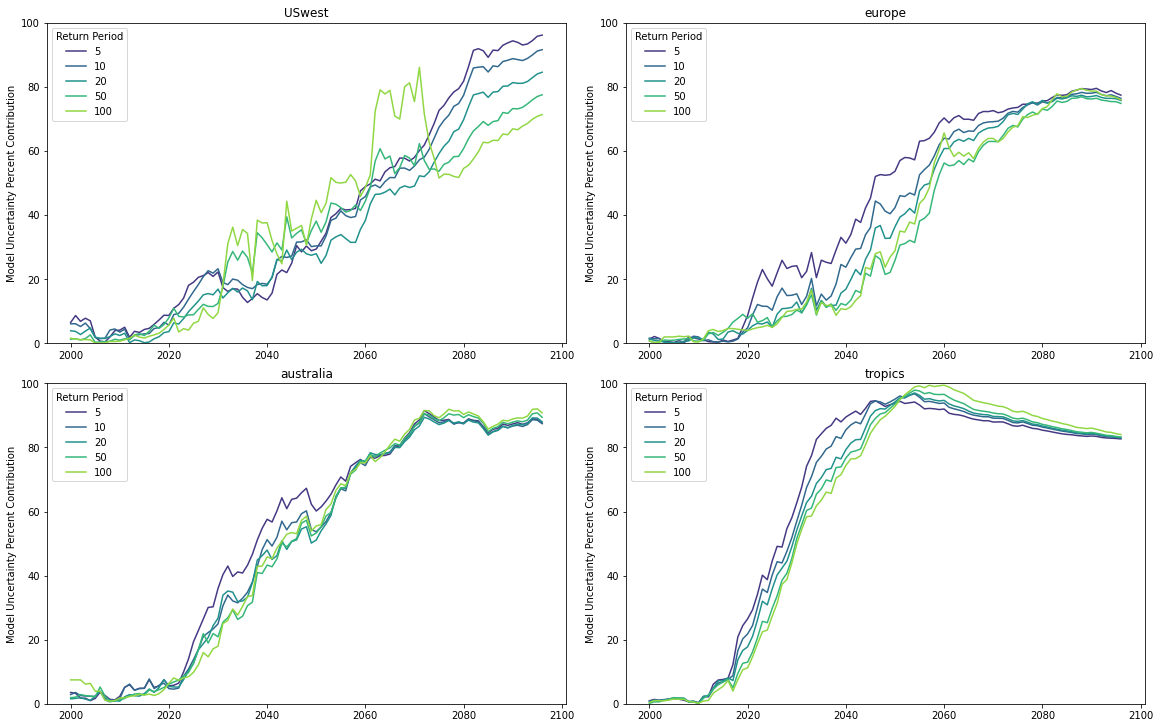

In [46]:
fig,ax = plt.subplots(nrows=2,ncols=2,constrained_layout=True,figsize=(16,10))
colors = sns.color_palette("viridis", len(test_return.concat_dim))
axes = [ax[0,0],ax[0,1],ax[1,0],ax[1,1]]
regions = ['USwest','europe','australia','tropics']
for axe,r in zip(axes,regions):
    for i,m in enumerate(test_return.concat_dim):
        axe.plot(test_return.sel(region=r,concat_dim=m).time,test_return.sel(region=r,concat_dim=m).MTratio,
                c=colors[i])
        labels=['5','10','20','50','100']
        axe.legend(labels=labels,loc=2,title='Return Period')
        axe.set_ylabel('Model Uncertainty Percent Contribution')
        axe.set_title(r)
        axe.set_ylim(0,100)

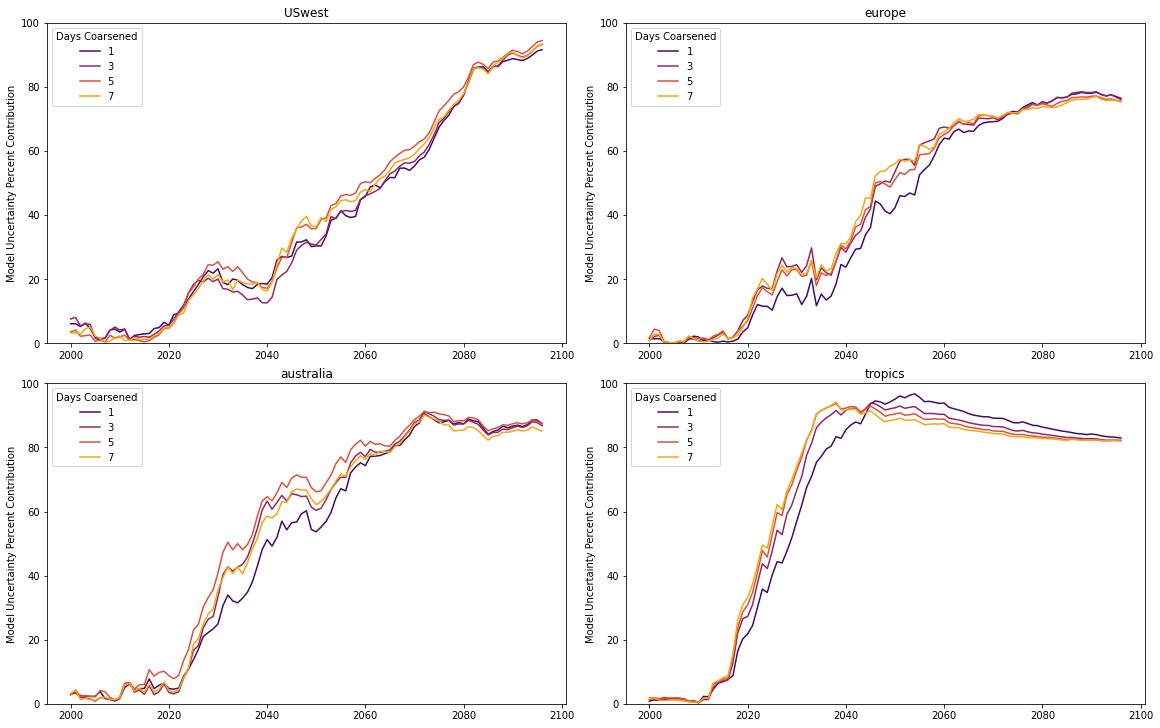

In [47]:
fig,ax = plt.subplots(nrows=2,ncols=2,constrained_layout=True,figsize=(16,10))
colors = sns.color_palette("inferno", len(test_coarsen.concat_dim))
axes = [ax[0,0],ax[0,1],ax[1,0],ax[1,1]]
regions = ['USwest','europe','australia','tropics']
for axe,r in zip(axes,regions):
    for i,m in enumerate(test_coarsen.concat_dim):
        axe.plot(test_coarsen.sel(region=r,concat_dim=m).time,test_coarsen.sel(region=r,concat_dim=m).MTratio,
                c=colors[i])
        labels=['1','3','5','7']
        axe.legend(labels=labels,loc=2,title='Days Coarsened')
        axe.set_ylabel('Model Uncertainty Percent Contribution')
        axe.set_title(r)
        axe.set_ylim(0,100)

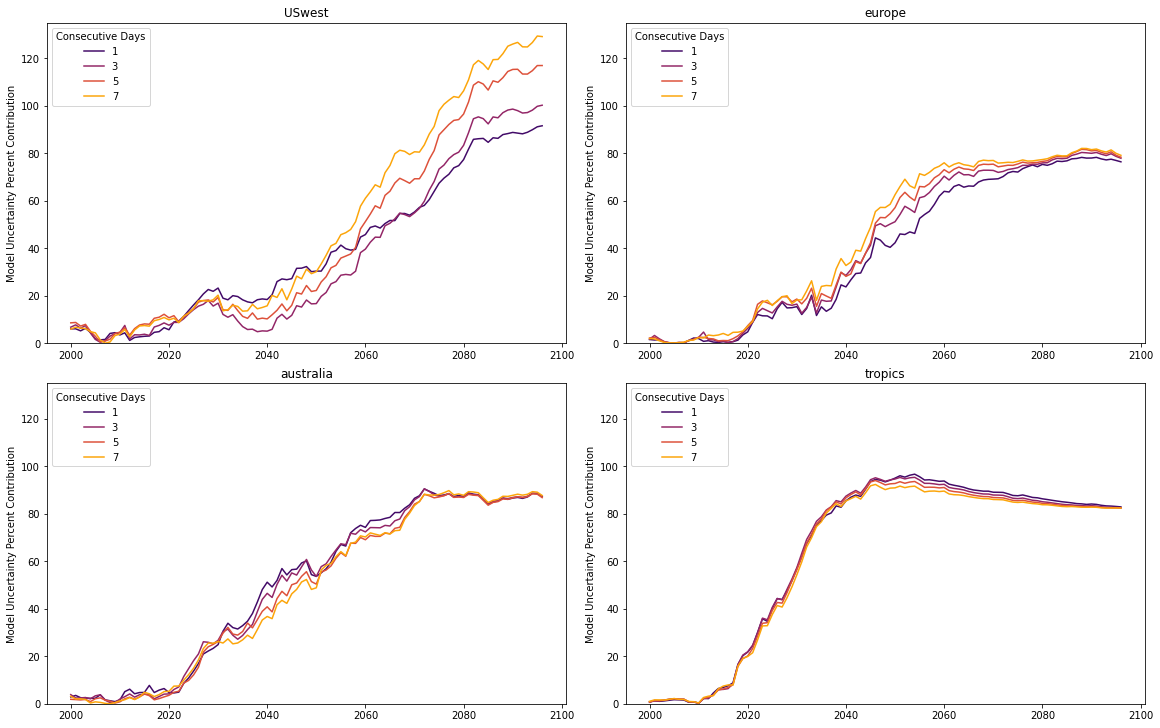

In [54]:
fig,ax = plt.subplots(nrows=2,ncols=2,constrained_layout=True,figsize=(16,10))
colors = sns.color_palette("inferno", len(test_conseq.concat_dim))
axes = [ax[0,0],ax[0,1],ax[1,0],ax[1,1]]
regions = ['USwest','europe','australia','tropics']
for axe,r in zip(axes,regions):
    for i,m in enumerate(test_conseq.concat_dim):
        axe.plot(test_conseq.sel(region=r,concat_dim=m).time,test_conseq.sel(region=r,concat_dim=m).MTratio,
                c=colors[i])
        labels=['1','3','5','7']
        axe.legend(labels=labels,loc=2,title='Consecutive Days')
        axe.set_ylabel('Model Uncertainty Percent Contribution')
        axe.set_title(r)
        axe.set_ylim(0,135)

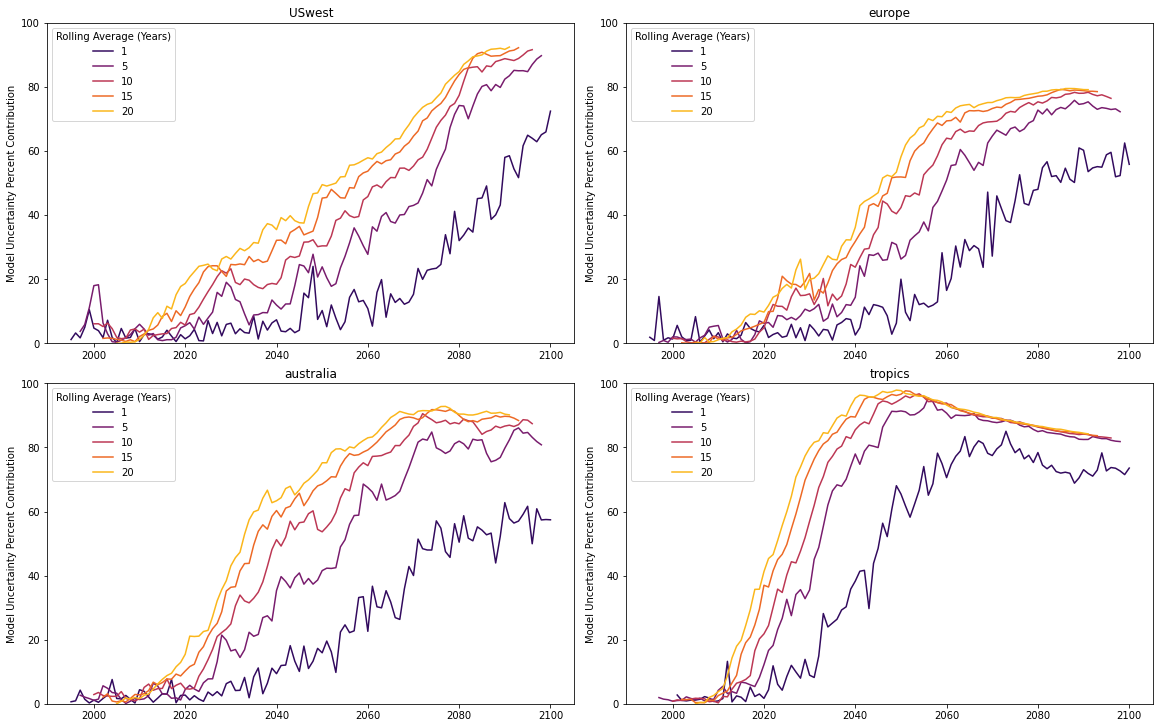

In [55]:
fig,ax = plt.subplots(nrows=2,ncols=2,constrained_layout=True,figsize=(16,10))
colors = sns.color_palette("inferno", len(test_rolling.concat_dim))
axes = [ax[0,0],ax[0,1],ax[1,0],ax[1,1]]
regions = ['USwest','europe','australia','tropics']
for axe,r in zip(axes,regions):
    for i,m in enumerate(test_rolling.concat_dim):
        axe.plot(test_rolling.sel(region=r,concat_dim=m).time,test_rolling.sel(region=r,concat_dim=m).MTratio,
                c=colors[i])
        labels=['1','5','10','15','20']
        axe.legend(labels=labels,loc=2,title='Rolling Average (Years)')
        axe.set_ylabel('Model Uncertainty Percent Contribution')
        axe.set_title(r)
        axe.set_ylim(0,100)

## Load Datasets - Local code 

In [90]:
# settings 
#for temp
# variable = 'tas'
# models = ['CanESM5','cesm_lens','MIROC6','MPI-ESM1-2-LR','EC-Earth3'] 

#for precip - still having issues getting EC-Earth data 
variable = 'pr'
models = ['CanESM5','cesm_lens','MIROC6','MPI-ESM1-2-LR'] 

In [91]:
# USeast = MultiModelLargeEnsemble(models=models,
#                                  variable=variable, granularity='day', lat=41.3, 
#                                  lon=-72.5,bucket='climateai_data_repository', 
#                                  path='tmp/internal_variability',
#                                  load=True)

In [92]:
USwest = MultiModelLargeEnsemble(models=models, scenario='ssp585',
                                 variable=variable, granularity='day', lat=37.7, lon=-122.4,
                                 bucket='climateai_data_repository', 
                                 path='tmp/internal_variability',
                                 load=True,single_member=False)

In [93]:
# iceland = MultiModelLargeEnsemble(models=models,
#                                  variable=variable, granularity='day', lat=65, lon=-19,
#                                  bucket='climateai_data_repository', 
#                                  path='tmp/internal_variability',
#                                  load=True)

In [94]:
europe = MultiModelLargeEnsemble(models=models,scenario='ssp585',
                                 variable=variable, granularity='day', lat=51,lon=10.5,
                                 bucket='climateai_data_repository', 
                                 path='tmp/internal_variability',
                                 load=True,single_member=False)

In [95]:
australia = MultiModelLargeEnsemble(models=models, scenario='ssp585',
                                 variable=variable, granularity='day', lat=-25.2,lon=133.7,
                                 bucket='climateai_data_repository', 
                                 path='tmp/internal_variability',
                                 load=True,single_member=False)

In [96]:
tropics = MultiModelLargeEnsemble(models=models,scenario='ssp585',
                                 variable=variable, granularity='day', lat=3.9,lon=-53.1,
                                 bucket='climateai_data_repository', 
                                 path='tmp/internal_variability',
                                 load=True,single_member=False)

### sensitivity testing
using model:internal ratio for testing the various parameters. When ratio > 1, model uncertainty dominates. When ratio < 1, internal variability dominates. 

### Return periods 

In [68]:
test_return = sensitivity_allregions(parameter='return_period',
                                     args = {'return_period':[5,10,20, 50, 100],
                                                'coarsen':1,
                                                'conseq_days':1,
                                                'rolling_average':10,
                                                'hist_slice':slice('1995','2014'),
                                             'postprocess':True
                                               })

In [69]:
test_return

<xarray.Dataset>
Dimensions:            (time: 86, member: 58, model: 5, concat_dim: 5, region: 4)
Coordinates:
  * time               (time) datetime64[ns] 2015-01-01 ... 2100-01-01
  * member             (member) int64 0 1 2 3 4 5 6 7 ... 51 52 53 54 55 56 57
    member_id          (model, member) object 'r16i1p2f1' ... 'r3i1p1f1'
  * model              (model) <U13 'CanESM5' 'cesm_lens' ... 'EC-Earth3'
    quantile           (concat_dim) float64 0.9995 0.9997 0.9999 0.9999 1.0
  * concat_dim         (concat_dim) int64 5 10 20 50 100
  * region             (region) <U9 'USwest' 'europe' 'australia' 'tropics'
Data variables: (12/17)
    tas_occurance      (region, concat_dim, model, member, time) float64 nan ...
    model_le           (region, concat_dim, time) float64 nan nan ... nan nan
    internal_mean_le   (region, concat_dim, time) float64 nan nan ... nan nan
    internal_var_le    (region, concat_dim, time) float64 nan nan ... nan nan
    total_le           (region, concat_dim, time) float64 nan nan ... nan nan
    total_direct_le    (region, concat_dim, time) float64 nan nan ... nan nan
    ...                 ...
    model_fit          (region, concat_dim, time) float64 nan nan ... nan nan
    total_fit          (region, concat_dim, time) float64 nan nan ... nan nan
    internal_fit_frac  (region, concat_dim, time) float64 nan nan ... nan nan
    model_fit_frac     (region, concat_dim, time) float64 nan nan ... nan nan
    total_direct_fit   (region, concat_dim, time) float64 nan nan ... nan nan
    MTratio            (region, concat_dim, time) float64 nan nan ... nan nan

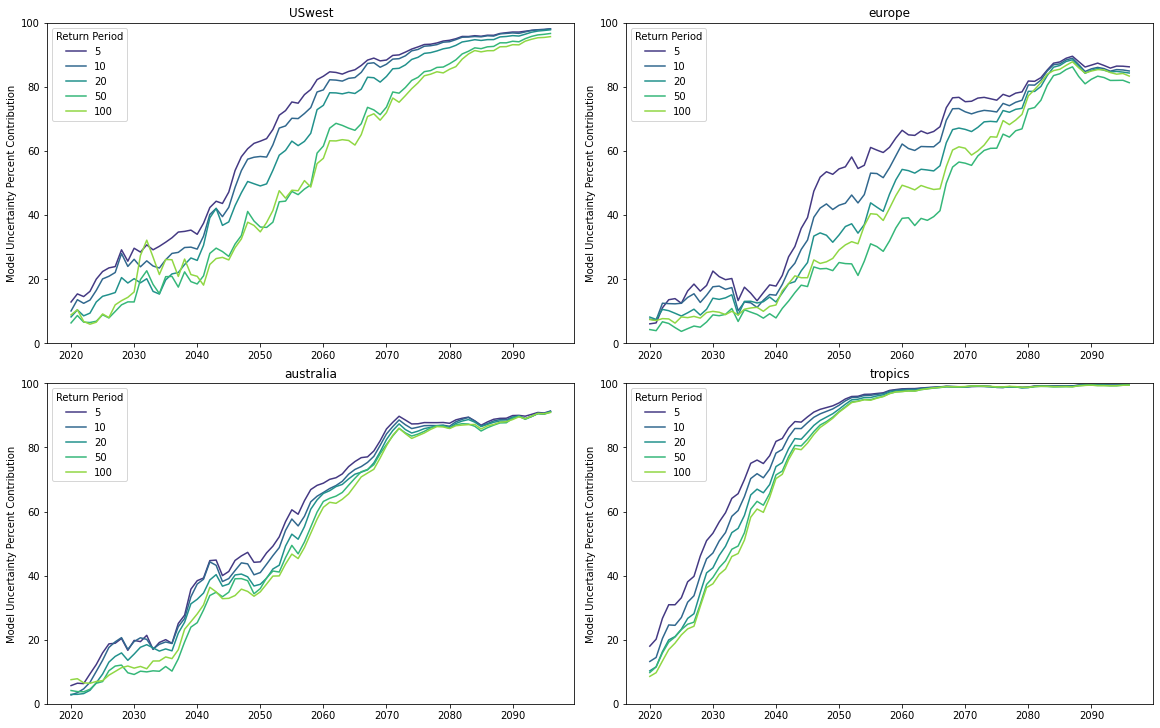

In [71]:
fig,ax = plt.subplots(nrows=2,ncols=2,constrained_layout=True,figsize=(16,10))
colors = sns.color_palette("viridis", len(test_return.concat_dim))
axes = [ax[0,0],ax[0,1],ax[1,0],ax[1,1]]
regions = ['USwest','europe','australia','tropics']
for axe,r in zip(axes,regions):
    for i,m in enumerate(test_return.concat_dim):
        axe.plot(test_return.sel(region=r,concat_dim=m).time,test_return.sel(region=r,concat_dim=m).model_le_frac,
                c=colors[i])
        labels=['5','10','20','50','100']
        axe.legend(labels=labels,loc=2,title='Return Period')
        axe.set_ylabel('Model Uncertainty Percent Contribution')
        axe.set_title(r)
        axe.set_ylim(0,100)
        # print(i)
        # model_frac = test_return.sel(region=r).model_le_frac
        # model_frac.plot(hue='concat_dim',c=colors[i],ax=axe,add_legend=False)
        

For temp: greater internal variability for larger return periods. US west and Europe have largest spreads. Convergence towards the end of the century for all return periods when model uncertainty dominates. This point is reached much earlier for the tropics. 

### Hist_slice

In [34]:
test_histslice = sensitivity_allregions(parameter='hist_slice',
                                        args = {'return_period':10,
                                                'coarsen':1,
                                                'conseq_days':1,
                                                'rolling_average':10,
                                                'hist_slice':[slice('1920','1940'),slice('1960','1980'),
                                                              slice('1990','2010'),slice('1995','2014'),
                                                              slice(None, None), slice('1990', None)],
                                               'postprocess':False}
                                       )

In [35]:
test_histslice

<xarray.Dataset>
Dimensions:            (time: 86, member: 50, model: 4, concat_dim: 6, region: 4)
Coordinates:
  * time               (time) datetime64[ns] 2015-01-01 ... 2100-01-01
  * member             (member) int64 0 1 2 3 4 5 6 7 ... 43 44 45 46 47 48 49
    member_id          (model, member) object 'r16i1p2f1' 'r16i1p1f1' ... nan
  * model              (model) <U13 'CanESM5' 'cesm_lens' ... 'MPI-ESM1-2-LR'
    quantile           (concat_dim) float64 0.9997 0.9997 ... 0.9997 0.9997
  * concat_dim         (concat_dim) object slice('1920', '1940', None) ... sl...
  * region             (region) <U9 'USwest' 'europe' 'australia' 'tropics'
Data variables: (12/17)
    pr_occurance       (region, concat_dim, model, member, time) float64 nan ...
    model_le           (region, concat_dim, time) float64 nan nan ... nan nan
    internal_mean_le   (region, concat_dim, time) float64 nan nan ... nan nan
    internal_var_le    (region, concat_dim, time) float64 nan nan ... nan nan
    total_le           (region, concat_dim, time) float64 nan nan ... nan nan
    total_direct_le    (region, concat_dim, time) float64 nan nan ... nan nan
    ...                 ...
    model_fit          (region, concat_dim, time) float64 nan nan ... nan nan
    total_fit          (region, concat_dim, time) float64 nan nan ... nan nan
    internal_fit_frac  (region, concat_dim, time) float64 nan nan ... nan nan
    model_fit_frac     (region, concat_dim, time) float64 nan nan ... nan nan
    total_direct_fit   (region, concat_dim, time) float64 nan nan ... nan nan
    MTratio            (region, concat_dim, time) float64 nan nan ... nan nan

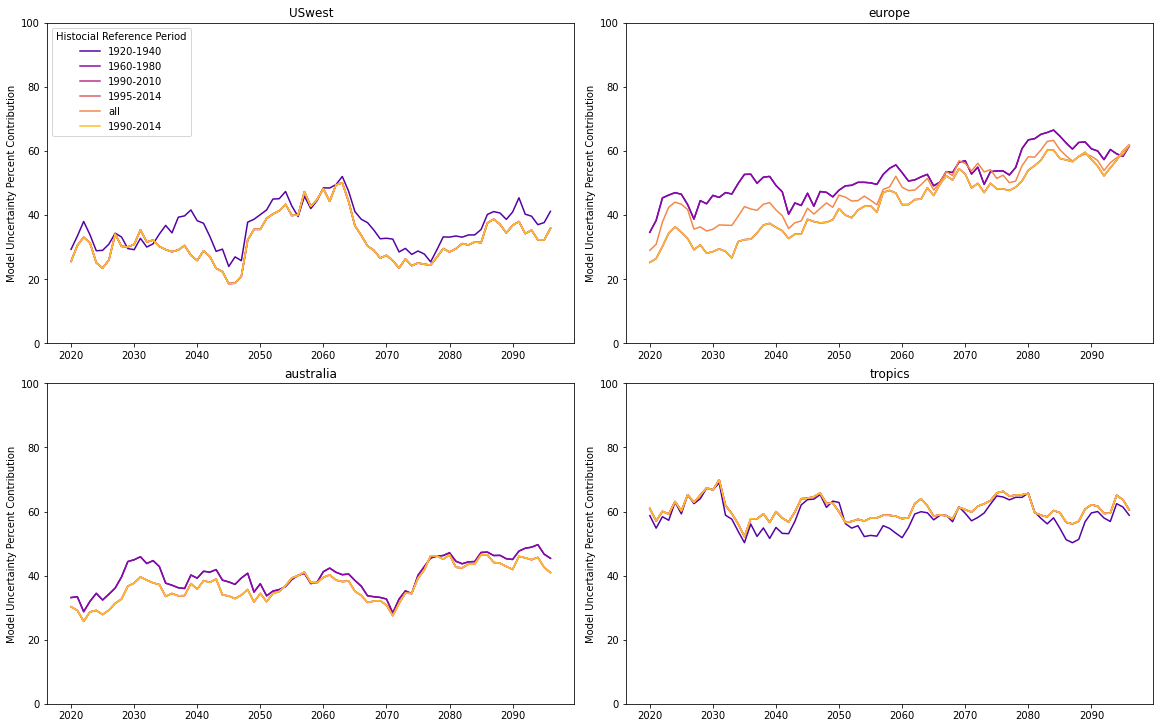

In [56]:
fig,ax = plt.subplots(nrows=2,ncols=2,constrained_layout=True,figsize=(16,10))
colors = sns.color_palette("plasma", len(test_histslice.concat_dim))
axes = [ax[0,0],ax[0,1],ax[1,0],ax[1,1]]
regions = ['USwest','europe','australia','tropics']
for axe,r in zip(axes,regions):
    for i in range(len(test_histslice.concat_dim)):
        axe.plot(test_histslice.sel(region=r).isel(concat_dim=i).time,test_histslice.sel(region=r).isel(concat_dim=i).model_le_frac,
                c=colors[i])
        axe.set_ylabel('Model Uncertainty Percent Contribution')
        axe.set_title(r)
        axe.set_ylim(0,100)
labels = ['1920-1940','1960-1980','1990-2010','1995-2014','all','1990-2014']
ax[0,0].legend(labels=labels,loc=2,title='Histocial Reference Period')

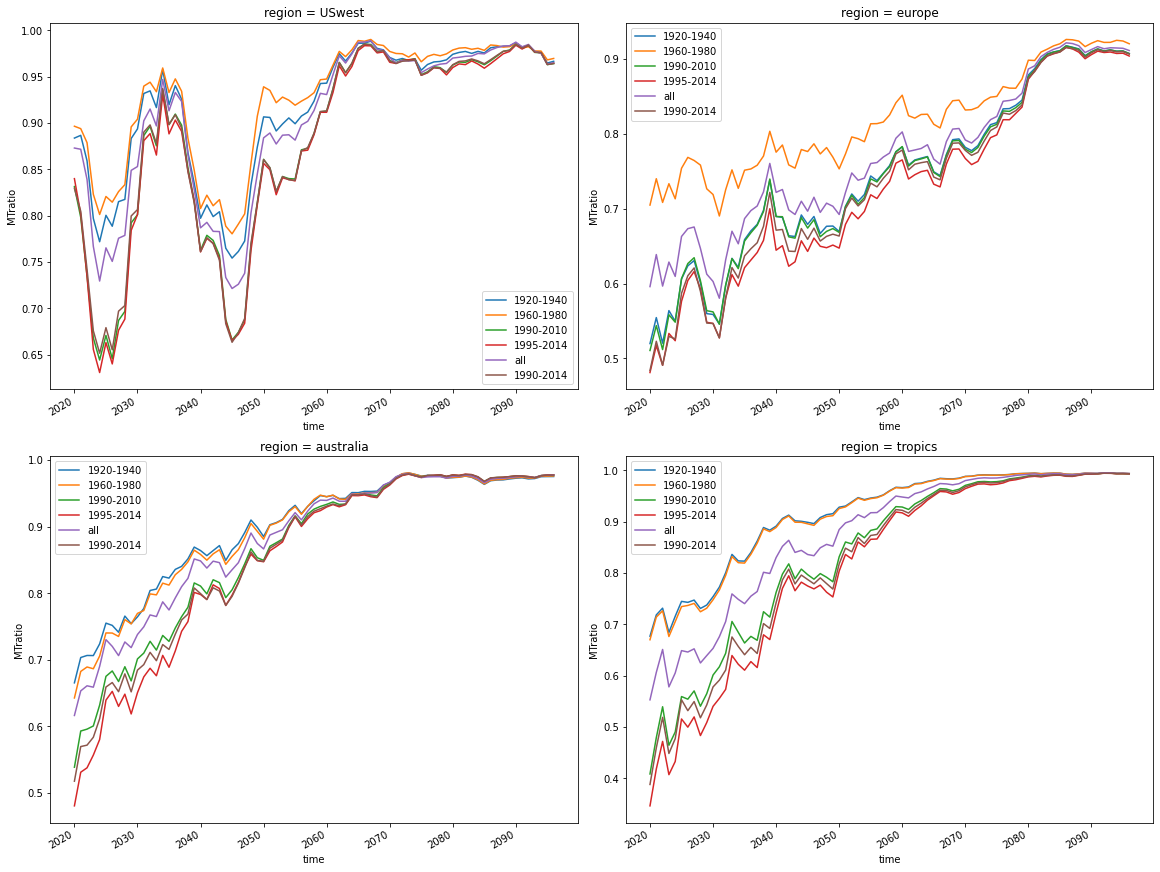

In [34]:
fig,ax = plt.subplots(nrows=2,ncols=2,constrained_layout=True,figsize=(16,12))
axes = [ax[0,0],ax[0,1],ax[1,0],ax[1,1]]
regions = ['USwest','europe','australia','tropics']
for axe,r in zip(axes,regions):
    test_histslice.sel(region=r).MTratio.plot(hue='concat_dim',ax=axe,add_legend=False);
    labels = ['1920-1940','1960-1980','1990-2010','1995-2014','all','1990-2014']
    axe.legend(labels)

### coarsen

In [72]:
test_coarsen = sensitivity_allregions(parameter='coarsen',
                                    args = {'return_period':10,
                                            'coarsen':[1,3,5,7],
                                            'conseq_days':1,
                                            'rolling_average':10,
                                            'hist_slice':slice('1995','2014'),
                                            'postprocess':True
                                           })

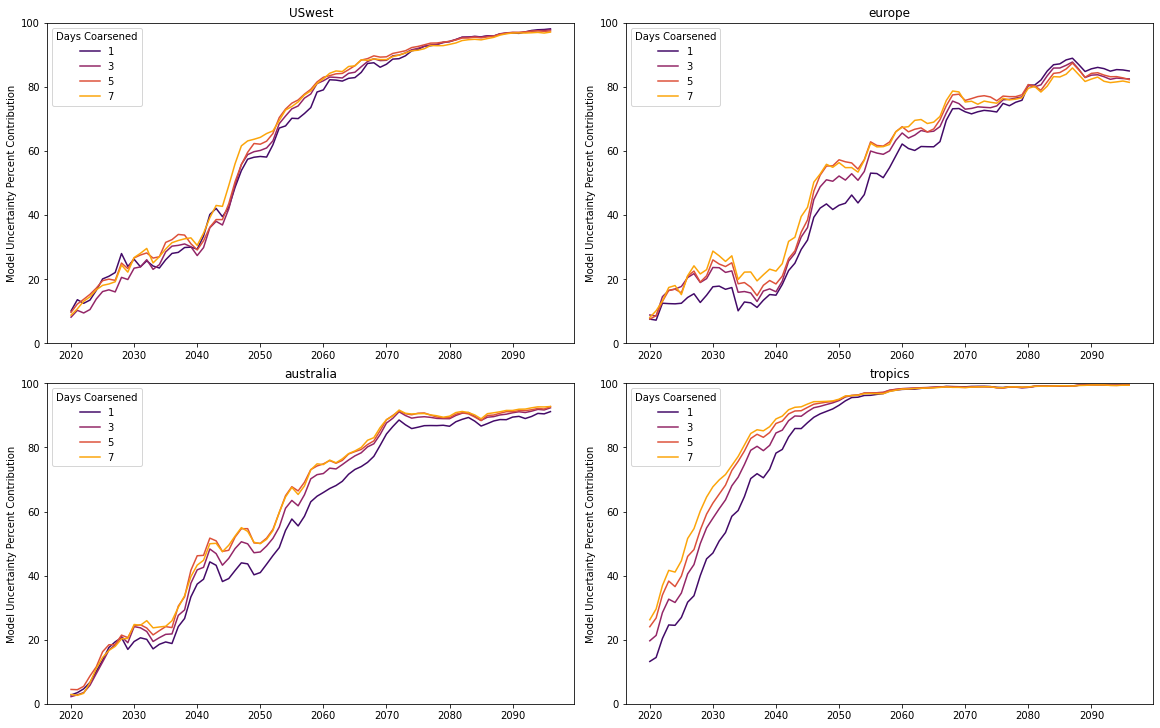

In [74]:
fig,ax = plt.subplots(nrows=2,ncols=2,constrained_layout=True,figsize=(16,10))
colors = sns.color_palette("inferno", len(test_coarsen.concat_dim))
axes = [ax[0,0],ax[0,1],ax[1,0],ax[1,1]]
regions = ['USwest','europe','australia','tropics']
for axe,r in zip(axes,regions):
    for i,m in enumerate(test_coarsen.concat_dim):
        axe.plot(test_coarsen.sel(region=r,concat_dim=m).time,test_coarsen.sel(region=r,concat_dim=m).model_le_frac,
                c=colors[i])
        labels=['1','3','5','7']
        axe.legend(labels=labels,loc=2,title='Days Coarsened')
        axe.set_ylabel('Model Uncertainty Percent Contribution')
        axe.set_title(r)
        axe.set_ylim(0,100)
        # print(i)
        # model_frac = test_return.sel(region=r).model_le_frac
        # model_frac.plot(hue='concat_dim',c=colors[i],ax=axe,add_legend=False)
        

### Consecutive days 

In [84]:
test_conseq = sensitivity_allregions(parameter='conseq_days',
                       args= {'return_period':10,
                              'coarsen':1,
                              'conseq_days':[1,3,5,7],
                              'rolling_average':10,
                              'hist_slice':slice('1995','2014'),
                              'postprocess':True
                             }
                      )

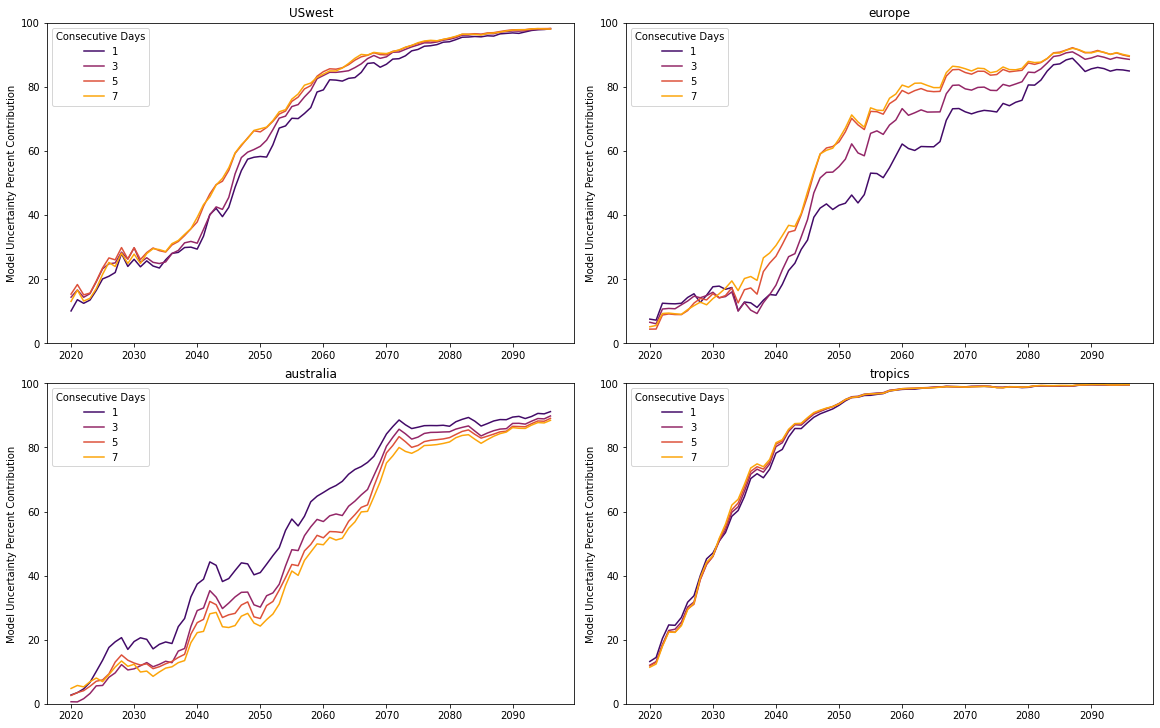

In [77]:
fig,ax = plt.subplots(nrows=2,ncols=2,constrained_layout=True,figsize=(16,10))
colors = sns.color_palette("inferno", len(test_conseq.concat_dim))
axes = [ax[0,0],ax[0,1],ax[1,0],ax[1,1]]
regions = ['USwest','europe','australia','tropics']
for axe,r in zip(axes,regions):
    for i,m in enumerate(test_conseq.concat_dim):
        axe.plot(test_conseq.sel(region=r,concat_dim=m).time,test_conseq.sel(region=r,concat_dim=m).model_le_frac,
                c=colors[i])
        labels=['1','3','5','7']
        axe.legend(labels=labels,loc=2,title='Consecutive Days')
        axe.set_ylabel('Model Uncertainty Percent Contribution')
        axe.set_title(r)
        axe.set_ylim(0,100)
        # print(i)
        # model_frac = test_return.sel(region=r).model_le_frac
        # model_frac.plot(hue='concat_dim',c=colors[i],ax=axe,add_legend=False)

#### coarsen / consec combo

In [97]:
test_conseq = extreme_internal_allregions(
                       args= {'return_period':10,
                              'coarsen':3,
                              'conseq_days':7,
                              'rolling_average':10,
                              'hist_slice':slice('1995','2014'),
                              'postprocess':True
                             }
                      )

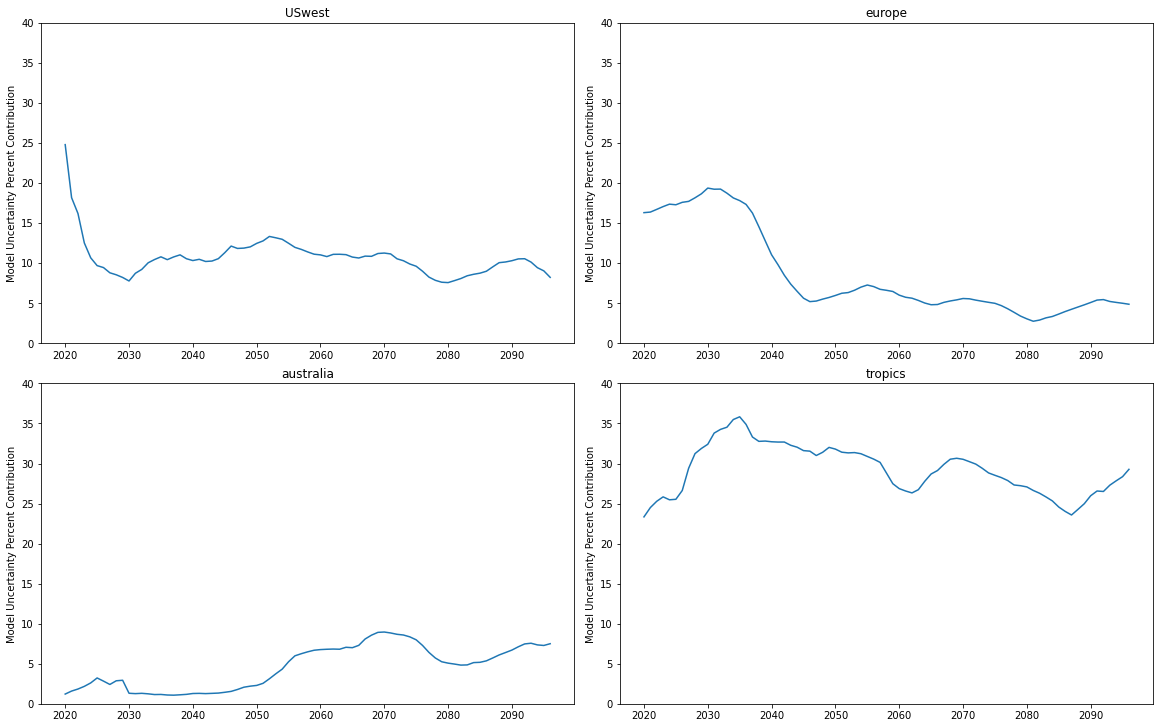

In [99]:
fig,ax = plt.subplots(nrows=2,ncols=2,constrained_layout=True,figsize=(16,10))
# colors = sns.color_palette("inferno", len(test_conseq.concat_dim))
axes = [ax[0,0],ax[0,1],ax[1,0],ax[1,1]]
regions = ['USwest','europe','australia','tropics']
for axe,r in zip(axes,regions):
    axe.plot(test_conseq.sel(region=r).time,test_conseq.sel(region=r).model_le_frac)
        # axe.legend(labels=labels,loc=2,title='Consecutive Days')
    axe.set_ylabel('Model Uncertainty Percent Contribution')
    axe.set_title(r)
    axe.set_ylim(0,40)
        # print(i)
        # model_frac = test_return.sel(region=r).model_le_frac
        # model_frac.plot(hue='concat_dim',c=colors[i],ax=axe,add_legend=False)

### rolling average

In [78]:
test_rolling = sensitivity_allregions(parameter='rolling_average',
                                        args = {'return_period':10,
                                                'coarsen':1,
                                                'conseq_days':1,
                                                'rolling_average':[1,5,10,15,20],
                                                'hist_slice':slice('1995','2014'),
                                                'postprocess':True
                                               }
                                     )

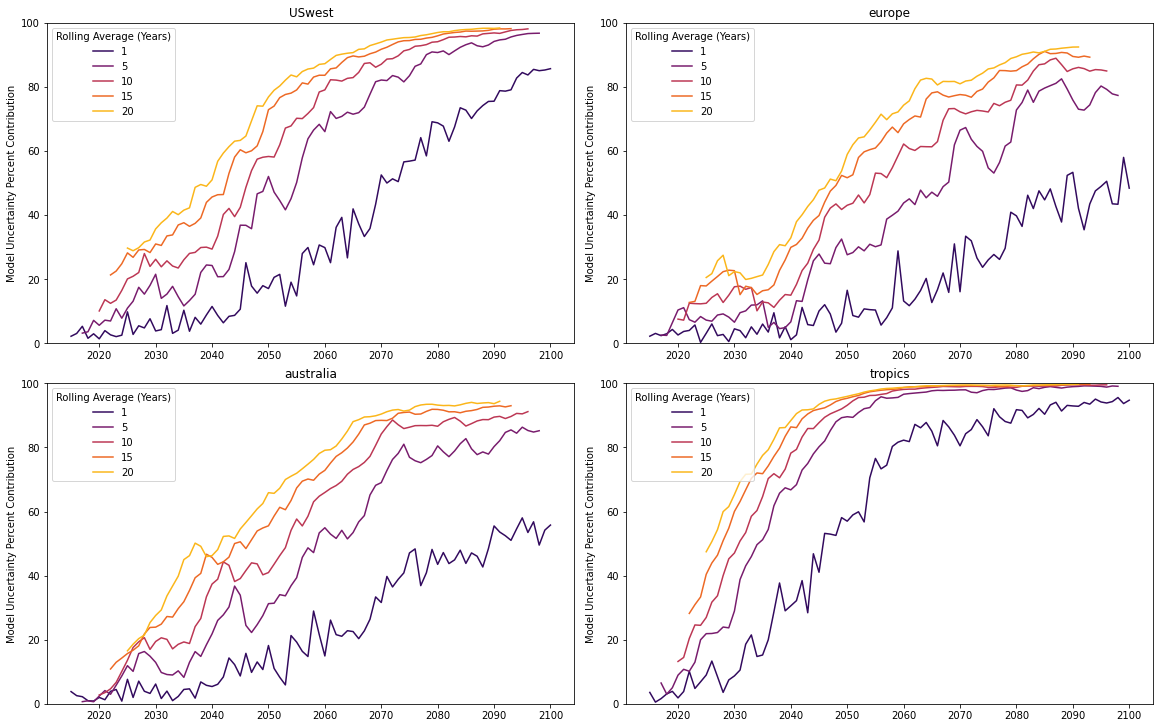

In [80]:
fig,ax = plt.subplots(nrows=2,ncols=2,constrained_layout=True,figsize=(16,10))
colors = sns.color_palette("inferno", len(test_rolling.concat_dim))
axes = [ax[0,0],ax[0,1],ax[1,0],ax[1,1]]
regions = ['USwest','europe','australia','tropics']
for axe,r in zip(axes,regions):
    for i,m in enumerate(test_rolling.concat_dim):
        axe.plot(test_rolling.sel(region=r,concat_dim=m).time,test_rolling.sel(region=r,concat_dim=m).model_le_frac,
                c=colors[i])
        labels=['1','5','10','15','20']
        axe.legend(labels=labels,loc=2,title='Rolling Average (Years)')
        axe.set_ylabel('Model Uncertainty Percent Contribution')
        axe.set_title(r)
        axe.set_ylim(0,100)
        # print(i)
        # model_frac = test_return.sel(region=r).model_le_frac
        # model_frac.plot(hue='concat_dim',c=colors[i],ax=axe,add_legend=False)